In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot

import matplotlib.pyplot as plt

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
# import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import category_encoders as ce

In [3]:
df= pd.read_excel('bank-additional-full.xlsx')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.shape

(41188, 21)

In [6]:
print(df.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

### Skewness + NA values + Outliers

In [7]:
df.skew()

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

In [8]:
print(df.groupby('y').size())

y
no     36548
yes     4640
dtype: int64


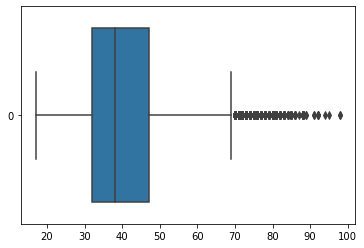

In [9]:
sns.boxplot(data = df.age, orient ='h')
plt.show()

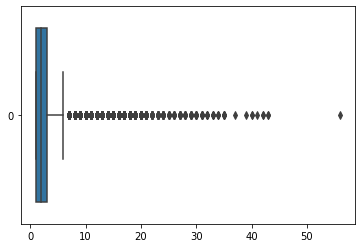

In [10]:
sns.boxplot(data = df.campaign, orient ='h')
plt.show()

## removing outliers


In [11]:
#detecting outliers using z score

z = np.abs(stats.zscore(df.age))
print(z)

[1.53303429 1.62899323 0.29018564 ... 1.53303429 0.38152696 3.26029527]


In [12]:
threshold = 3
print(np.where(z > 3))

(array([27757, 27780, 27800, 27802, 27805, 27808, 27810, 27811, 27812,
       27813, 27814, 27815, 27816, 27817, 27818, 27826, 27851, 27875,
       27930, 27950, 27951, 27963, 28220, 28221, 28312, 28456, 29263,
       29498, 29625, 29682, 29973, 29977, 29981, 29990, 30000, 30004,
       30006, 30072, 30078, 30079, 30103, 30110, 30133, 30171, 30214,
       30225, 30241, 30334, 30430, 30460, 30589, 35833, 35856, 35878,
       35973, 36183, 36285, 36311, 36383, 36384, 36816, 36998, 37136,
       37137, 37186, 37190, 37192, 37193, 37195, 37206, 37207, 37213,
       37219, 37235, 37237, 37239, 37257, 37260, 37341, 37355, 37403,
       37454, 37455, 37472, 37479, 37493, 37505, 37509, 37512, 37525,
       37532, 37597, 37601, 37602, 37604, 37635, 37675, 37679, 37690,
       37692, 37715, 37735, 37736, 37743, 37756, 37769, 37775, 37784,
       37818, 37819, 37820, 37861, 37868, 37870, 37873, 37905, 37920,
       37946, 37951, 37952, 37954, 37999, 38005, 38019, 38020, 38022,
       38032, 38033

In [13]:
#shape before removing outliers
df.shape


(41188, 21)

In [14]:
# removing outliers
df = df[(z < 3)]
#shape after removing outliers
df.shape


(40819, 21)

# change the type of the data

In [15]:
# changer le type de la colonne sexe de object à category
df["job"] = df["job"].astype('category')
df["marital"] = df["marital"].astype('category')
df["education"] = df["education"].astype('category')
df["default"] = df["default"].astype('category')
df["housing"] = df["housing"].astype('category')
df["loan"] = df["loan"].astype('category')
df["contact"] = df["contact"].astype('category')
df["month"] = df["month"].astype('category')
df["day_of_week"] = df["day_of_week"].astype('category')
df["duration"] = df["duration"].astype('int64')
df["poutcome"] = df["poutcome"].astype('category')
df["y"] = df["y"].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40819 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             40819 non-null  int64   
 1   job             40819 non-null  category
 2   marital         40819 non-null  category
 3   education       40819 non-null  category
 4   default         40819 non-null  category
 5   housing         40819 non-null  category
 6   loan            40819 non-null  category
 7   contact         40819 non-null  category
 8   month           40819 non-null  category
 9   day_of_week     40819 non-null  category
 10  duration        40819 non-null  int64   
 11  campaign        40819 non-null  int64   
 12  pdays           40819 non-null  int64   
 13  previous        40819 non-null  int64   
 14  poutcome        40819 non-null  category
 15  emp.var.rate    40819 non-null  float64 
 16  cons.price.idx  40819 non-null  float64 
 17  cons.conf.id

# Data cleaning

In [16]:
df.isna().any()


age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [17]:
df.duplicated().sum()

12

In [18]:
df=df.drop_duplicates()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


## Machine learning 

In [19]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
#Implementing one-hot encoding through category_encoder

ce_OHE = ce.OneHotEncoder(cols=['job','marital','education', 'default', 'housing', 'loan',
       'contact', 'month','day_of_week','poutcome'])

df1 = ce_OHE.fit_transform(df)
df1.head()

,age,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,...,previous,poutcome_1,poutcome_2,poutcome_3,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
# Split-out validation dataset
array = df1.values
X = array[:,0:63]
y = array[:,63]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
#80% of the data are used for the training and 20% are used for the validation
# x_train and y_train are for preparing the models

In [28]:
# We don’t know which algorithms would be good on this problem or what configurations to use.

# We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

# Let’s test 6 different algorithms:

# Logistic Regression (LR)
# Linear Discriminant Analysis (LDA)
# K-Nearest Neighbors (KNN).
# Classification and Regression Trees (CART).
# Gaussian Naive Bayes (NB).
# Support Vector Machines (SVM).
# This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

In [22]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.911411 (0.003716)
LDA: 0.910522 (0.003316)
KNN: 0.904549 (0.003764)
CART: 0.891285 (0.004585)
NB: 0.861847 (0.005321)
SVM: 0.897442 (0.003076)


In [29]:
# LR has the largest estimated accuracy score at about 0.98 or 98%.

In [30]:
# We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. 
# There is a population 
# of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation).

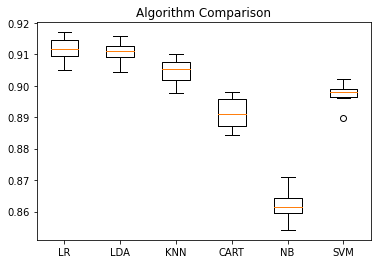

In [25]:
# Compare Algorithms
from matplotlib import pyplot

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [31]:
# We must choose an algorithm to use to make predictions.

# The results in the previous section suggest that the LR
# was perhaps the most accurate model. We will use this model as our final model.

# Now we want to get an idea of the accuracy of the model on our validation set.

# This will give us an independent final check on the accuracy of the best model. It is valuable to keep a 
# validation set just in case you made a slip during training, such 
# as overfitting to the training set or a data leak. Both of these issues will result in an overly optimistic result.

In [32]:
...
# Make predictions on validation dataset
# model = SVC(gamma='auto')
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [33]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9169321244792943
[[7109  190]
 [ 488  375]]
              precision    recall  f1-score   support

          no       0.94      0.97      0.95      7299
         yes       0.66      0.43      0.53       863

    accuracy                           0.92      8162
   macro avg       0.80      0.70      0.74      8162
weighted avg       0.91      0.92      0.91      8162

